# 11월21일 (월) dataloader 시간계산
- Dataloader부분, 아래의 1, 2의 시간 비교 해봐라
    - init에서 통째로 load
        - class로 불러오는 곳 위 아래에 time 측정해서 정리하고 보여드리기
    - getitem에서 차례로
        - tqdm 라이브러리 사용법 익혀서 1 epoch당 걸리는 시간 측정해서 정리하고 보여드리기

In [64]:
import tqdm

In [65]:
import os

In [66]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "1"  # Set the GPU 2 to use
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [67]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

Device: cuda
Current cuda device: 0
Count of using GPUs: 1


# ResNet + tensorboard + torchinfo + Epoch당 걸리는 시간


In [2]:
import torch.nn as nn
import torch.optim as optim
from resnet import ResNet18, ResNet34, ResNet50, ResNet101, ResNet152
import os
import torchvision.models as models
from skimage import io, transform
from torch.utils.tensorboard import SummaryWriter



import torch.backends.cudnn as cudnn
import torch
import re
import PIL
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as tr
from matplotlib import pyplot as plt
import time

''' random seed fixed'''
import random

path = "/home/sldev1/Project/hyeongeun_test/data/FER"
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [4]:
#Simple Learning Rate Scheduler
def lr_scheduler(optimizer, epoch):
    lr = learning_rate
    if epoch == 50:
        lr /= 2
    if epoch == 100:
        lr /= 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Xavier
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

# 기존 code

In [3]:
from torch.utils.data import Dataset
import glob


def img_load(img_path):

    jpg = glob.glob(img_path+'*.jpg')
    sort_jpg = sorted(jpg, key=lambda s: int(re.findall(r'\d+', s)[1]))
    #print("img_load def is play")
    return sort_jpg


def label_load(label_path):
    #enumerate #파이썬내장함수.. 강민규사원님은 이걸로 쓰셨는데 느리더래
    label = glob.glob(label_path+'*exp.npy')
    sort_label = sorted(label,key=lambda s: int(re.findall(r'\d+', s)[1]))
    #print("label_load def is play")
    return sort_label
    
    
    
class MyFERDataset(Dataset):
    
    def __init__(self, img_path_base, label_path_base, train=None, transform=None):
        super(MyFERDataset, self).__init__()
        
        if train == True:
            self.img_path = img_path_base+'/train_set/images/'
            self.label_path = label_path_base+'/train_set/annotations/'
        else:
            self.img_path = img_path_base+'/val_set/images/'
            self.label_path = label_path_base+'/val_set/annotations/'
        self.img = img_load(self.img_path)
        self.label = label_load(self.label_path)

        self.transform = transform
        
    
    def __getitem__(self, idx):
        img_read = io.imread(self.img[idx]) 
        label_read = np.load(self.label[idx])
        label_read = label_read.astype(np.int64)
        label_tr = torch.from_numpy(label_read)
        # timer = time.time() - start
        
        
        if self.transform:
            img_tr = self.transform(img_read)
        
        
        return img_tr, label_tr
    

    def __len__(self):
        return len(self.label)
    
    if __name__ == "__main__":
        print('hi, i\'m main')

hi, i'm main


# 고친 코드

In [1]:
import torchvision
from PIL import Image

img = img_load("/home/sldev1/Project/hyeongeun_test/data/FER/train_set/images/")
print(img[-1], len(img))

img_list = []

for x in enumerate(img):
    tensor_img = torchvision.io.read_image(x[1])
    # print(tensor_img)
    numpy_img = tensor_img.numpy()
    # print(numpy_img)
    img_list.append(numpy_img)
# print(numpy_img.size())
    


# x = torchvision.io.read_image(img[1])
# type(x)
# len(img)

# img_list = []

# for x in range(len(img)):
#     # read_img = torchvision.io.read_image(img[x])
#     read_img = Image.open(img[x])
#     array_img = np.array(read_img)
#     img_list.append(array_img)

# print(img_list)


NameError: name 'img_load' is not defined

In [ ]:
img_list[1]

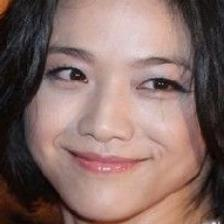

In [100]:
read_img

In [99]:
type(read_img)

PIL.JpegImagePlugin.JpegImageFile

In [57]:
label = label_load("/home/sldev1/Project/hyeongeun_test/data/FER/train_set/annotations/")
# len(label)
read_label = []
for x in range(len(label)):
    n = int(np.load(label[x]).item())
    read_label.append(n)
print(read_label[1])

0


In [5]:
import glob

def img_load(img_path):

    jpg = glob.glob(img_path+'*.jpg')
    sort_jpg = sorted(jpg, key=lambda s: int(re.findall(r'\d+', s)[1]))
    #print("img_load def is play")
    return sort_jpg


def label_load(label_path):
    #enumerate #파이썬내장함수.. 강민규사원님은 이걸로 쓰셨는데 느리더래
    label = glob.glob(label_path+'*exp.npy')
    sort_label = sorted(label,key=lambda s: int(re.findall(r'\d+', s)[1]))
    #print("label_load def is play")
    return sort_label

In [75]:
from torch.utils.data import Dataset
    
class MyFERDataset(Dataset):
    
    def __init__(self, img_path_base, label_path_base, train=None, transform=None):
        super(MyFERDataset, self).__init__()
        
        if train == True:
            self.img_path = img_path_base+'/train_set/images/'
            self.label_path = label_path_base+'/train_set/annotations/'
        else:
            self.img_path = img_path_base+'/val_set/images/'
            self.label_path = label_path_base+'/val_set/annotations/'
        self.img = img_load(self.img_path)
        self.label = label_load(self.label_path)

        self.label_read = []
        
        for x in enumerate(self.img):
            tensor_img = torchvision.io.read_image(x[1])
            numpy_img = tensor_img.numpy()
        
        
        # for x in range(len(self.img)):
        #     self.img_read = torchvision.io.read_image(self.img[x])
        #     self.n = int(np.load(self.label[x]).item())
        #     self.label_read.append(self.n)

        self.transform = transform
        
    
    def __getitem__(self, idx):
        self.img_read[idx]
        self.label_read[idx]
        if self.transform:
            img_tr = self.transform(self.img_read)
        
        
        return img_tr, self.label_read
    

    def __len__(self):
        return len(self.label)
    
    if __name__ == "__main__":
        print('hi, i\'m main')

hi, i'm main


In [76]:
transform_train = tr.Compose([tr.ToTensor(),
                              tr.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
transform_test = tr.Compose([tr.ToTensor()])


traindata_start = time.time()
train_dataset = MyFERDataset(img_path_base = path,
                              label_path_base = path,
                              train=True,
                              transform=transform_train)
traindata_end = time.time() - traindata_start
print("train dataset class 걸린 시간 :", traindata_end, "초")


testdata_start = time.time()
test_dataset = MyFERDataset(img_path_base = path,
                              label_path_base = path,
                              train=False,
                              transform=transform_test)
testdata_end = time.time() - testdata_start
print("test dataset class 걸린 시간 :", testdata_end, "초")
print("total dataset class 걸린 시간 :", traindata_end+testdata_end, "초")




train dataset class 걸린 시간 : 108.2501585483551 초
test dataset class 걸린 시간 : 2.5069098472595215 초
total dataset class 걸린 시간 : 110.75706839561462 초


In [77]:
test_dataset[0]

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [78]:
start = time.time()
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)
endtime = time.time()-start
print(endtime)
# 기존 : 0.0012450218200683594
# 바뀐 코드 : 0.0007066726684570312

0.0007066726684570312


In [95]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "<ipython-input-75-477541731028>", line 31, in __getitem__
    img_tr = self.transform(self.img_read)
  File "/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py", line 61, in __call__
    img = t(img)
  File "/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py", line 98, in __call__
    return F.to_tensor(pic)
  File "/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional.py", line 114, in to_tensor
    raise TypeError('pic should be PIL Image or ndarray. Got {}'.format(type(pic)))
TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>


In [82]:
labels.size()
print(images.size())

NameError: name 'labels' is not defined

In [9]:
print(labels)

tensor([0, 0, 4, 0, 2, 5, 6, 0, 7, 7, 6, 1, 4, 2, 7, 4, 2, 4, 2, 2, 7, 3, 0, 7,
        1, 3, 2, 5, 7, 2, 7, 3])


In [91]:
device = 'cuda'
model = ResNet50()
# ResNet18, ResNet34, ResNet50, ResNet101, ResNet152 중에 택일하여 사용

In [92]:
model.apply(init_weights)
model = model.to(device)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  


In [93]:
learning_rate = 0.001
num_epoch = 200
model_name = 'ResNet_FER_11.22.pth'

loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0001)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_loss = 0
valid_loss = 0
correct = 0
total_cnt = 0
best_acc = 0

In [94]:
import time
start = time.time() #시작 시간 저장
# Train
writer = SummaryWriter("11.22, 시간측정")
for epoch in range(num_epoch):
    
    if epoch == 1:
        start = time.time() #시작 시간 저장
    if epoch == 2:
        epoch_time_for_1 = time.time()-start
        timer = epoch_time_for_1 * num_epoch
        print("학습에 총 걸리는 시간 :", timer)    
    
    

    print(f"====== { epoch+1} epoch of { num_epoch } ======")
    model.train()
    lr_scheduler(optimizer, epoch)
    train_loss = 0
    valid_loss = 0
    correct = 0
    total_cnt = 0
    
    
    
    # Train Phase
    for step, batch in enumerate(train_loader):
        
        start1 = time.time()

        #  input and target
        batch[0], batch[1] = batch[0].to(device), batch[1].to(device)
        optimizer.zero_grad()
        
        logits = model(batch[0]) #ResNet50(batch[0])
        loss = loss_fn(logits, batch[1])
        # loss.backward()
        
        endtime = time.time()-start1
        batch_size1=len(batch[1].item())
        print(f"{step}step, {batch_size1}batch동안 {endtime}걸렸습니다.")
        
        train_loss += loss.item()
        #_, predict = logits.max(1)
        _, predict = torch.max(logits, dim=1)
        
        total_cnt += batch[1].size(0)
        correct +=  predict.eq(batch[1]).sum().item()
        
        if step % 1000 == 0 and step != 0:
            print(f"\n====== { step } Step of { len(train_loader) } ======")
            print(f"Train Acc : { correct / total_cnt }")
            print(f"Train Loss : { loss.item() / batch[1].size(0) }")
        
        loss.backward()
        optimizer.step()
            
    train_acc_visual = (correct / total_cnt) * 100
    train_loss_visual = train_loss / batch[1].size(0)
    writer.add_scalar('acc/train', train_acc_visual, epoch)
    writer.add_scalar('loss/train', train_loss_visual, epoch)            
            

    correct = 0
    total_cnt = 0
    
# Test Phase
    with torch.no_grad():
        model.eval()
        for step, batch in enumerate(test_loader):
            # input and target
            batch[0], batch[1] = batch[0].to(device), batch[1].to(device)
            total_cnt += batch[1].size(0)
            logits = model(batch[0])
            valid_loss += loss_fn(logits, batch[1])
            _, predict = logits.max(1)
            correct += predict.eq(batch[1]).sum().item()
        valid_acc = correct / total_cnt
        print(f"\nValid Acc : { valid_acc }")    
        print(f"Valid Loss : { valid_loss / total_cnt }")
        
        valid_acc_visual = valid_acc * 100
        valid_loss_visual = valid_loss / total_cnt
        writer.add_scalar('acc/valid', valid_acc_visual, epoch)
        writer.add_scalar('loss/valid', valid_loss_visual, epoch)
        
        

        if(valid_acc > best_acc):
            best_acc = valid_acc
            # torch.save(model, model_name)
            # print("Model Saved!")
            torch.save(model.state_dict(), model_name)
            print('Model Saved!')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

====== 1 epoch of 200 ======


IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/_utils/fetch.py", line 49, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "<ipython-input-75-477541731028>", line 28, in __getitem__
    self.img_read[idx]
IndexError: index 116408 is out of bounds for dimension 0 with size 3


In [18]:
model.load_state_dict(torch.load('./ResNet_FER_1110.pt'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BottleNeck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affi

In [19]:
from torchinfo import summary
summary(model, (1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   --                        --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,472
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─MaxPool2d: 1-3                         [1, 64, 56, 56]           --
├─Sequential: 1-4                        [1, 256, 56, 56]          --
│    └─BottleNeck: 2-1                   [1, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─Conv2d: 3-3                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-4             [1, 64, 56, 56]           128
│    │    └─Conv2d: 3-5                  [1, 256, 56, 56]          16,384
│    │    └─BatchNorm2d: 3-6             [1, 256, 56, 56]          512
│    │    └─Sequential: 3-7              [1, 256, 56, 56]          

In [20]:
label_tags = {
    0 : 'Neutral',
    1 : 'Happiness', #기쁨
    2 : 'Sadness', #슬픔
    3 : 'Suprise', #놀람
    4 : 'Fear', #
    5 : 'Disgust', #역겨움
    6 : 'Anger', #분노
    7 : 'Content'
}

- 정보 :
    1. batch[0] : 이미지
    2. batch[1] : 라벨

In [21]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [34]:
for step, batch in enumerate(test_loader):
    batch[0], batch[1] = batch[0].to(device), batch[1].to(device)

    logits = model(batch[0])
    #print(batch[0], "\n****************\n", batch[1])
    print("\n******logits*******\n",logits)
    print("\n\n\n******logits_max*******\n",logits.max(1))
    
    _, predict = torch.max(logits, dim=1)
    # _, predict = logits.max()
    print("\n\n***********_____***********\n", _, "\n\n**********predict************\n", predict)
    
    # correct += predict.eq(batch[1]).sum().item()
    # print(correct)


    
    #valid_loss += loss_fn(logits, batch[1])
    #_, predict = logits.max(1)
    #correct += predict.eq(batch[1]).sum().item()
    #print(_,"\n\n\n", predict)


******logits*******
 tensor([[ 2.1195,  2.7134,  2.5982, -2.9567, -0.5159, -0.1822,  1.0926, -0.5362,
         -0.4513,  0.6408],
        [ 2.7935,  3.1004,  2.8023, -3.0783, -0.2720, -0.3425,  2.2156, -0.8654,
         -0.2742,  1.2150],
        [ 2.7593,  3.4954,  2.7906, -2.9082, -0.6154, -0.2392,  1.6464, -0.7873,
          0.1432,  1.1898],
        [ 1.8798,  3.4004,  2.7182, -2.5275, -0.2999,  0.0271,  1.9154, -0.8489,
         -0.0723,  0.5180]], device='cuda:0', grad_fn=<AddmmBackward0>)



******logits_max*******
 torch.return_types.max(
values=tensor([2.7134, 3.1004, 3.4954, 3.4004], device='cuda:0',
       grad_fn=<MaxBackward0>),
indices=tensor([1, 1, 1, 1], device='cuda:0'))


***********_____***********
 tensor([2.7134, 3.1004, 3.4954, 3.4004], device='cuda:0',
       grad_fn=<MaxBackward0>) 

**********predict************
 tensor([1, 1, 1, 1], device='cuda:0')

******logits*******
 tensor([[ 2.8309,  4.2414,  2.9858, -3.4669, -0.0742, -0.1062,  3.0931, -1.6901,
        

KeyboardInterrupt: 

In [135]:
data_idx = np.random.randint(len(test_dataset))
print(f"data_idx : {data_idx}\n\n")

input_img = test_dataset[0][0].unsqueeze(dim=0).to(device)
# input_img = test_dataset[data_idx][0].unsqueeze(dim=0).to(device)
# print(f"iput_img : {input_img}")
output = model(input_img)
output



x = torch.max(output, 1)
x

# torch.return_types.max(
# values=tensor([3.1417], device='cuda:0', grad_fn=<MaxBackward0>),
# indices=tensor([1], device='cuda:0'))

_, argmax = torch.max(output, 1)
print(f"_ : {_}, \nargmax : {argmax}")
# type(argmax.size())

pred = label_tags[argmax.item()]
pred
#label = label_tags[test_dataset[data_idx][1].item()]
#label


#pred = label_tags[argmax.item()]
        #test_dataset = test_dataset.numpy()
#label = label_tags[test_dataset[data_idx][1]]

data_idx : 2431


_ : tensor([3.1417], device='cuda:0', grad_fn=<MaxBackward0>), 
argmax : tensor([1], device='cuda:0')


'Happiness'

In [40]:
len(test_dataset)

3999

In [74]:
x = label_load("/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/")[0].split('/')
x[-1]

'0_exp.npy'

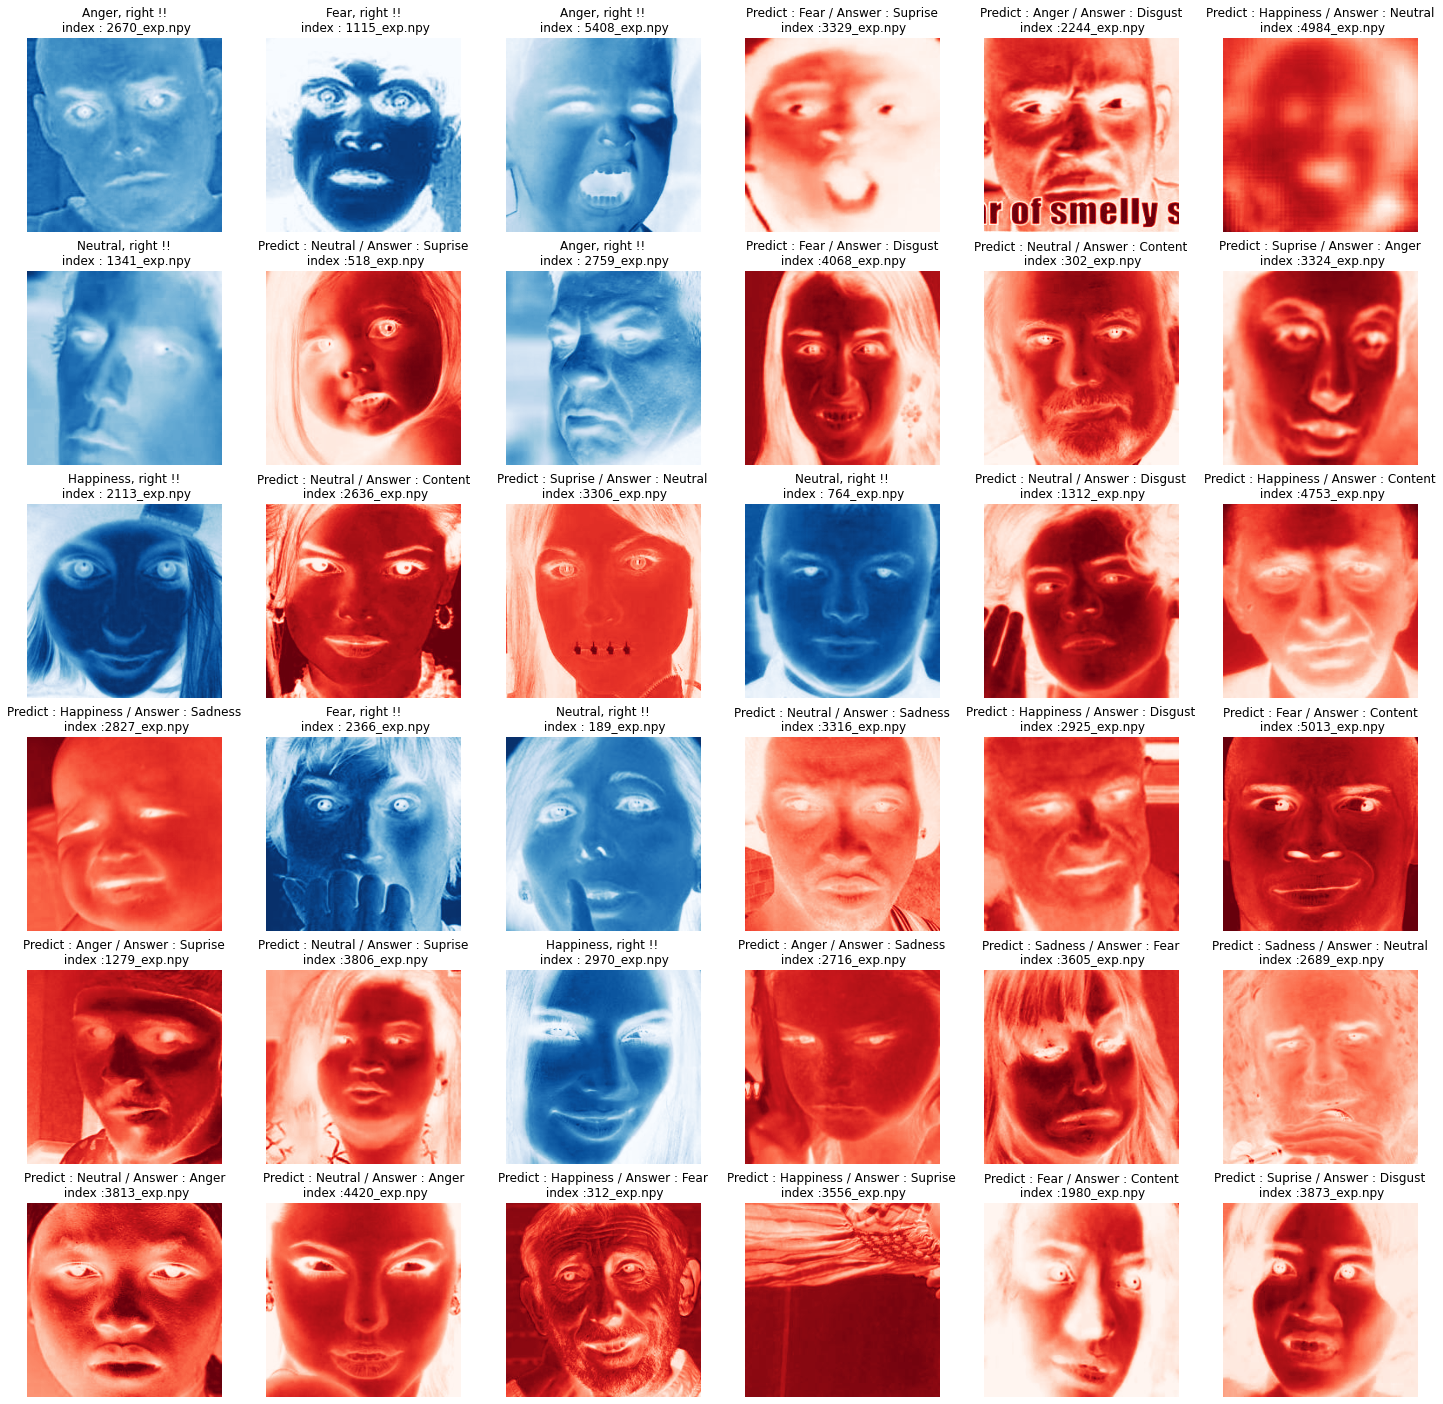

In [77]:
import cv2

columns = 6
rows = 6
fig = plt.figure(figsize=(25,25))

device = "cuda"

# inference
for i in range(1, columns*rows+1):
    data_idx = np.random.randint(4000)
    input_img = test_dataset[data_idx][0].unsqueeze(dim=0).to(device) 
    

    output = model(input_img)
    _, argmax = torch.max(output, 1)
    pred = label_tags[argmax.item()]
    #test_dataset = test_dataset.numpy()
    label = label_tags[test_dataset[data_idx][1].item()]
    
    
    x = label_load("/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/")[data_idx].split('/')
    x = x[-1]
    
    
    fig.add_subplot(rows, columns, i)
    if pred == label:
        plt.title(pred + ', right !!\n index : ' + str(x))
        cmap = 'Blues'
    else:
        plt.title('Predict : ' + pred + ' / Answer : ' +  label + '\n index :' + str(x))
        cmap = 'Reds'
    plot_img = test_dataset[data_idx][0][0,:,:]
    plt.imshow(plot_img, cmap=cmap)
    #plt.imshow(plot_img)
    plt.axis('off')
    
plt.show() 

In [1]:
num = 4420
x = cv2.imread(f"/home/sldev1/Project/hyeongeun_test/data/FER/val_set/images/{num}.jpg", cv2.IMREAD_COLOR)
y = int(np.load(f"/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/{num}_exp.npy"))

label_tags = {
    0 : 'Neutral',
    1 : 'Happiness', #기쁨
    2 : 'Sadness', #슬픔
    3 : 'Suprise', #놀람
    4 : 'Fear', #
    5 : 'Disgust', #역겨움
    6 : 'Anger', #분노
    7 : 'Content' #만족
}

plt.title(label_tags[y])
plt.imshow(x)



NameError: name 'cv2' is not defined

In [81]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [1]:
!tensorboard --logdir=runs

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# 테스트 데이터에 대한 모델 테스트
https://learn.microsoft.com/ko-kr/windows/ai/windows-ml/tutorials/pytorch-train-model #보류